In [1]:
import os
os.chdir("../../../")

In [2]:
import torch
from torchts.nn.models.ode import ODESolver
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
# x'(t) = 3 cos (5t)
dt = 0.01

def x_prime(prev_val, coeffs):
    return coeffs["a"]*torch.cos(coeffs["w"]*prev_val["t"])

def t_prime(prev_val, coeffs):
    return 1

ode = {"x": x_prime, "t": t_prime}

# Initial conditions [0,0,0]
ode_init = {"x": 0, "t": 0}

# Constants (Parameters)
ode_coeffs = {"a": 3., "w": 5.}


# Dataset: x(t) = 0.6 sin(5t)

In [4]:
result = torch.cat((0.6*torch.sin(5*torch.arange(0,10,dt).view(1000,1)), torch.arange(0,10,dt).t().view(1000,1)), dim=1)

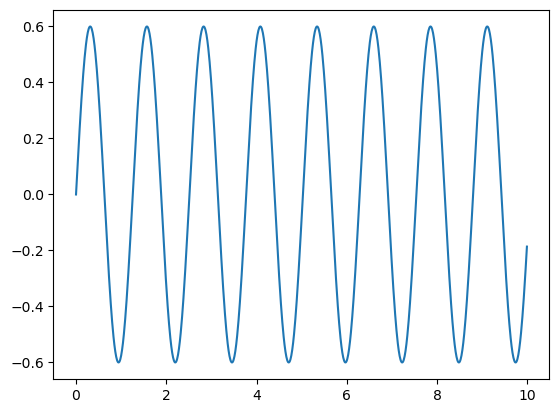

In [5]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(result_np[:,1], result_np[:,0])

plt.show()

# Euler's method for training

In [6]:
ode_train_coeffs = {"a": 1.,"w": 1.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

In [7]:
ode_solver_train.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.5},
    max_epochs=50,
    scheduler=torch.optim.lr_scheduler.MultiStepLR,
    scheduler_params={"milestones": [20],"gamma": 0.2}
)

Epoch: 0	 Loss: tensor(4.5270e-05, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(-2.4322, requires_grad=True), 'w': Parameter containing:
tensor(-0.1929, requires_grad=True)}
Epoch: 1	 Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(-1.8558, requires_grad=True), 'w': Parameter containing:
tensor(-1.6210, requires_grad=True)}
Epoch: 2	 Loss: tensor(0.0002, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(-0.9097, requires_grad=True), 'w': Parameter containing:
tensor(-4.3786, requires_grad=True)}
Epoch: 3	 Loss: tensor(4.1739e-05, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(-0.7750, requires_grad=True), 'w': Parameter containing:
tensor(-4.7117, requires_grad=True)}
Epoch: 4	 Loss: tensor(0.0003, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(-0.2855, requires_grad=True), 'w': Parameter containing:
tensor(-4.6512, requires_grad=True)}
Epoch: 5	 Loss: tensor(3.3292e-05, grad_fn=<MseLossBackwa

In [8]:
ode_solver_train.coeffs

{'a': Parameter containing:
 tensor(0.0256, requires_grad=True),
 'w': Parameter containing:
 tensor(-3.1735, requires_grad=True)}

# Predictions for nt=1000

In [9]:
results_test = ode_solver_train(1000)
results_test

tensor([[0.0000e+00, 0.0000e+00],
        [2.5617e-04, 1.0000e-02],
        [5.1222e-04, 2.0000e-02],
        ...,
        [1.8023e-03, 9.9701e+00],
        [2.0520e-03, 9.9801e+00],
        [2.2998e-03, 9.9901e+00]], grad_fn=<StackBackward>)

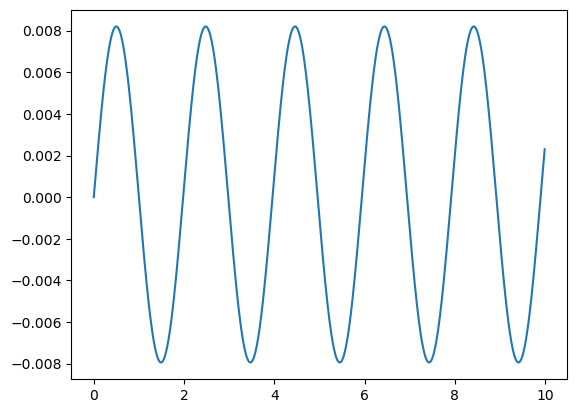

In [10]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,1], results_test_np[:,0])

plt.show()

# Runge-Kutta for training

In [11]:
ode_train_coeffs = {"a": 1.,"w": 1.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=None
)

In [12]:
ode_solver_train.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.5},
    max_epochs=50,
    scheduler=torch.optim.lr_scheduler.MultiStepLR,
    scheduler_params={"milestones": [20],"gamma": 0.2}
)

Epoch: 0	 Loss: tensor(0.0002, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(-0.0997, requires_grad=True), 'w': Parameter containing:
tensor(4.6741, requires_grad=True)}
Epoch: 1	 Loss: tensor(0.0001, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.1854, requires_grad=True), 'w': Parameter containing:
tensor(6.2720, requires_grad=True)}
Epoch: 2	 Loss: tensor(1.3846e-05, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(-1.9322, requires_grad=True), 'w': Parameter containing:
tensor(6.2679, requires_grad=True)}
Epoch: 3	 Loss: tensor(5.9804e-06, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.0151, requires_grad=True), 'w': Parameter containing:
tensor(3.5418, requires_grad=True)}
Epoch: 4	 Loss: tensor(2.1066e-06, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.5775, requires_grad=True), 'w': Parameter containing:
tensor(1.7847, requires_grad=True)}
Epoch: 5	 Loss: tensor(0.0002, grad_fn=<MseLossBackward>)
{'a

In [13]:
ode_solver_train.coeffs

{'a': Parameter containing:
 tensor(-0.2824, requires_grad=True),
 'w': Parameter containing:
 tensor(-8.0455, requires_grad=True)}

# Predictions for nt = 1000

In [14]:
results_test = ode_solver_train(1000)
results_test

tensor([[ 0.0000e+00,  0.0000e+00],
        [-2.8206e-03,  1.0000e-02],
        [-5.6229e-03,  2.0000e-02],
        ...,
        [ 3.4903e-02,  9.9701e+00],
        [ 3.4496e-02,  9.9801e+00],
        [ 3.3866e-02,  9.9901e+00]], grad_fn=<StackBackward>)

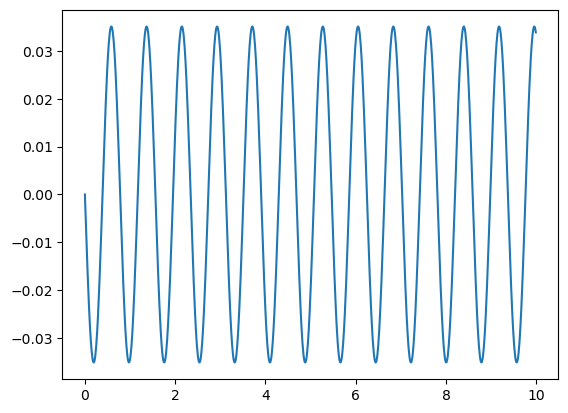

In [15]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,1], results_test_np[:,0])

plt.show()